In [1]:

import _init_
from constants import *
from set_path import *
from config import *
from functions import *

In [23]:
# folder = 'Summit/AddMassExtDir/Test/'
# folder = 'Summit/AddMassExtDir/CleanTest/'
folder = 'Summit/AddMassExtDir/Zbg0.2/'
# folder = 'Summit/Testec51dd8/'
# folder = 'Summit/NoMass/'
# folder = 'Summit/AddMassExtDir/TwoCell/'
# folder = 'Summit/MetDepCooling/RemoveTFloor/'
# folder = 'Summit/MetDepCooling/Zbg0.2RemoveTfloor/'
# folder = 'Summit/GasGravity/RemoveTFloor/'
# folder = 'Summit/GasGravity/Fiducial/''

In [24]:
hdf5_folder = os.path.join(h5_path, folder, 'PhaseOutflowRates/')
infile   = os.path.join(hdf5_folder, 'metal_uniform.in')
dom_min, dom_max, ncells = getdomain(infile)
fac = 1
zrange = np.linspace(dom_min[2], dom_max[2], (fac*int(ncells[2])))
xrange = np.linspace(dom_min[0], dom_max[0], (fac*int(ncells[0])))
yrange = np.linspace(dom_min[1], dom_max[1], (fac*int(ncells[1])))

In [25]:
os.chdir(hdf5_folder)
list_file = glob.glob("*.h5")

In [26]:
timestep = np.zeros(len(list_file))
tot_mass_flux = np.zeros((len(list_file), zrange.shape[0]))
warm_mass_flux = np.zeros((len(list_file), zrange.shape[0]))
hot_mass_flux = np.zeros((len(list_file), zrange.shape[0]))
for i in range(len(list_file)):
    hf = h5py.File(list_file[i] ,'r')
    timestep[i] = np.array(hf.get("Timestep")) 
    tot_mass_flux[i] = np.array(hf.get("TotalOutflowRate"))
    warm_mass_flux[i] = np.array(hf.get("WarmOutflowRate"))
    hot_mass_flux[i] = np.array(hf.get("HotOutflowRate"))

In [27]:
np.amax(timestep)

162.323502218768

(0.0, 200.0)

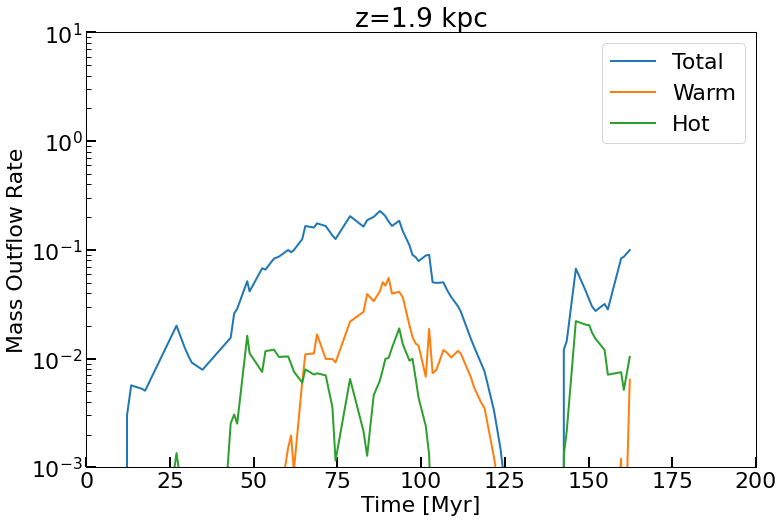

In [28]:

fig, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.02, 'hspace':0.02},figsize=(12, 8))
# ax.plot(timestep, tot_mass_flux[:,-1], 'o')
munit = yr_to_sec/Msun/1.e-2
index = 750
listarr = [tot_mass_flux[:,index], warm_mass_flux[:,index], hot_mass_flux[:,index]]
label = ['Total', 'Warm', 'Hot']
i = 0
for arr in listarr:
    tt = timestep 
    indexes = list(range(len(tt)))
    indexes.sort(key=tt.__getitem__)
    sorted_time = list(map(tt.__getitem__, indexes))
    sorted_mdot  = list(map(arr.__getitem__, indexes))
    ax.plot(sorted_time, np.abs(sorted_mdot)*munit, '-', label=label[i],markersize=12, lw=2.)
    i+=1


ax.legend()
ax.set_title('z=%.1f'%(zrange[index]/kpc) + ' kpc')
ax.set_yscale('log')
ax.set_ylim(1.e-3,1.e1)
ax.set_ylabel("Mass Outflow Rate")
ax.set_xlabel('Time [Myr]')
ax.set_xlim(0.0,200.)

In [107]:
time_mask = (timestep>100.)
tot_mass_flux_avg = np.average(tot_mass_flux[time_mask], axis=0)
warm_mass_flux_avg = np.average(warm_mass_flux[time_mask], axis=0)
hot_mass_flux_avg = np.average(hot_mass_flux[time_mask], axis=0)

Text(0.5, 0, 'z [kpc]')

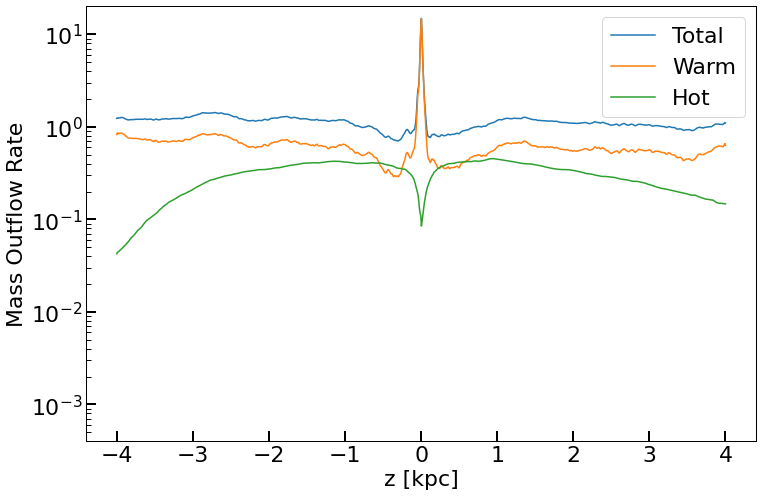

In [108]:

fig, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.02, 'hspace':0.02},figsize=(12, 8))
# ax.plot(timestep, tot_mass_flux[:,-1], 'o')
munit = yr_to_sec/Msun/1.e-2
index = 400
listarr = [tot_mass_flux_avg, warm_mass_flux_avg, hot_mass_flux_avg]
label = ['Total', 'Warm', 'Hot']
i = 0
for arr in listarr:
    ax.plot(zrange/kpc,np.asarray(np.abs(arr))*munit, '-', label=label[i],  markersize=12)
    i+=1


ax.legend()
ax.set_yscale('log')
ax.set_ylim(4.e-4, 20.)
ax.set_ylabel("Mass Outflow Rate")
ax.set_xlabel('z [kpc]')
# ax.set_xlim(0.1,4.)

In [ ]:
np.ama